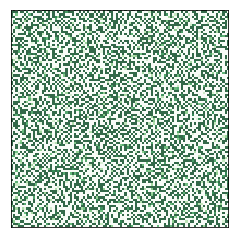

In [3]:
%matplotlib inline
from quake import Earthquake
from Cell2D import Cell2DViewer

from matplotlib import rc
rc('animation', html='html5')

steve = Earthquake(100, fth=3)
viewer = Cell2DViewer(steve)
anim = viewer.animate(frames=100,interval=100)

In [4]:
anim

In [1]:
%matplotlib inline
from plot_quake import * 
from quake import Earthquake

nan

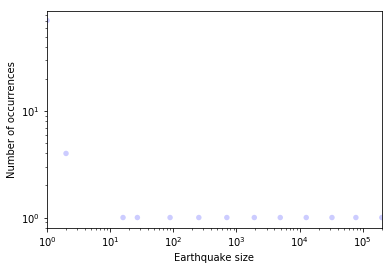

In [2]:
calculate_power_law(iters=100,plot=True, n=1000, fth=3)

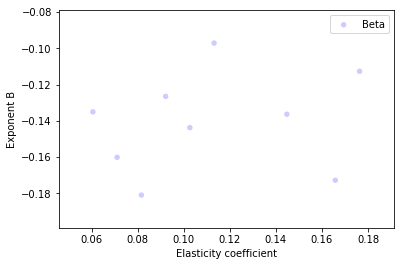

In [3]:
plot_power_law(n=100, iters=10)

In [ ]:
plot_frequency(iters=10000, plot=True, n=1000)